In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
MaskRCNN testing/experimentation script
@author: matt
"""
# %% imports
# python
import os, sys
import argparse

import torch
import torchvision
from torchvision.utils import draw_bounding_boxes

import matplotlib.pyplot as plt

# my stuff
sys.path.insert(1, os.path.abspath('..'))
sys.path.insert(1, os.path.abspath('../mrcnn'))
from train_mrcnn import make_new_maskr
from data import MaskRCNNDataset
import mrcnn.utils as utils

In [2]:
# set this to the data path base directory
DATA_PATH = "../supp/testkc"

In [3]:
# setup net and dataset
net = torchvision.models.detection.fasterrcnn_resnet50_fpn(
    pretrained=True)
dataset = MaskRCNNDataset(DATA_PATH, "train", None)
data = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True, num_workers=1,
    collate_fn = utils.collate_fn)

In [4]:
# get a single batch
images, targets = next(iter(data))
images = list(image for image in images)
targets = [{k: v for k, v in t.items()}
           for t in targets]

/home/matt/anaconda3/envs/pyt/lib/python3.8/site-packages/torchvision/transforms/functional.py:165: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448216815/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  img = torch.as_tensor(np.asarray(pic))


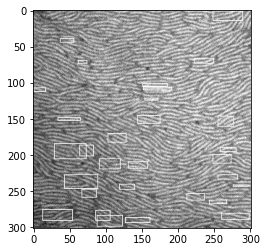

In [9]:
# show example with some random bounding boxes
i_disp = (images[0] * 255).byte()
i_disp = torch.cat((i_disp, i_disp, i_disp), dim=0)
subs = torch.randint(0,bb.shape[0],size=(50,1)).numpy()
bb = bb[subs,:].squeeze()
bb_img = draw_bounding_boxes(i_disp, bb)
plt.imshow(torch.swapaxes(bb_img, 0, 2).numpy())

In [ ]:
# run the net one time
output = net(images, targets)

In [ ]:
# for inference
net.eval()
x = [torch.rand(1, 300, 300), torch.rand(1, 300, 300)]
predictions = net(x)